In [1]:
import pandas as pd
results = pd.read_csv('seven_regressor_results_fitted.csv').drop('Unnamed: 0',axis=1)
results['model'] = results['model'].apply(lambda x: 'RandomForestRegressor' if x=='rff' else x)

In [68]:
results[results['RMSE']==min(results['RMSE'])]

,R2 score,RMSE,model,time,features
209,0.910412,10.300083,RandomForestRegressor,1.65227,30


In [2]:
from functools import reduce
ols = results[results['model']=='OLS']
ols.columns = [i+'_OLS' for i in ols.columns if i!='features']+['features']
EN = results[results['model']=='ElasticNet']
EN.columns = [i+'_ElasticNet' for i in EN.columns if i!='features']+['features']
BR = results[results['model']=='BayesianRidge']
BR.columns = [i+'_BayesianRidge' for i in BR.columns if i!='features']+['features']
lasso = results[results['model']=='Lasso']
lasso.columns = [i+'_Lasso' for i in lasso.columns if i!='features']+['features']
ridge = results[results['model']=='Ridge']
ridge.columns = [i+'_ridge' for i in ridge.columns if i!='features']+['features']
KNN = results[results['model']=='KNN']
KNN.columns = [i+'_KNN' for i in KNN.columns if i!='features']+['features']
rf = results[results['model']=='RandomForestRegressor']
rf.columns = [i+'_randomforest' for i in rf.columns if i!='features']+['features']

tables = [ols,EN,BR,lasso,ridge,KNN,rf]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['features'],
                                            how='outer'), tables)
df_merged.drop([i for i in df_merged.columns if 'model_' in i],axis=1,inplace=True)

R2 = [i for i in df_merged.columns if 'R2 score' in i]
RMSE = [i for i in df_merged.columns if 'RMSE_' in i]
time = [i for i in df_merged.columns if 'time_' in i]
df_merged = df_merged[['features']+R2+RMSE+time]
df_merged.head()

,features,R2 score_OLS,R2 score_ElasticNet,R2 score_BayesianRidge,R2 score_Lasso,R2 score_ridge,R2 score_KNN,R2 score_randomforest,RMSE_OLS,RMSE_ElasticNet,...,RMSE_ridge,RMSE_KNN,RMSE_randomforest,time_OLS,time_ElasticNet,time_BayesianRidge,time_Lasso,time_ridge,time_KNN,time_randomforest
0,1,0.414541,0.408897,0.414526,0.403109,0.414541,0.550583,0.532625,25.993311,26.118309,...,25.993311,22.773928,23.224474,0.002003,0.001802,0.002429,0.001521,0.001614,0.178951,0.045903
1,2,0.446605,0.410840,0.446662,0.405381,0.446609,0.478902,0.544630,25.417013,26.225490,...,25.416935,24.664181,23.056291,0.001594,0.001519,0.001865,0.001517,0.001494,0.104170,0.048547
2,3,0.479475,0.464234,0.479539,0.458488,0.479476,0.610577,0.704564,24.818792,25.179518,...,24.818771,21.466950,18.697833,0.002195,0.001896,0.002233,0.001896,0.001537,0.104133,0.094853
3,4,0.490769,0.477496,0.490900,0.472116,0.490771,0.745389,0.819514,24.529054,24.846671,...,24.529008,17.344513,14.603087,0.003286,0.002719,0.002900,0.003437,0.002038,0.029937,0.256800
4,5,0.503711,0.487034,0.503836,0.482738,0.503712,0.738181,0.856397,24.116927,24.518788,...,24.116894,17.516819,12.972902,0.002850,0.002905,0.003001,0.002891,0.002100,0.031185,0.278989


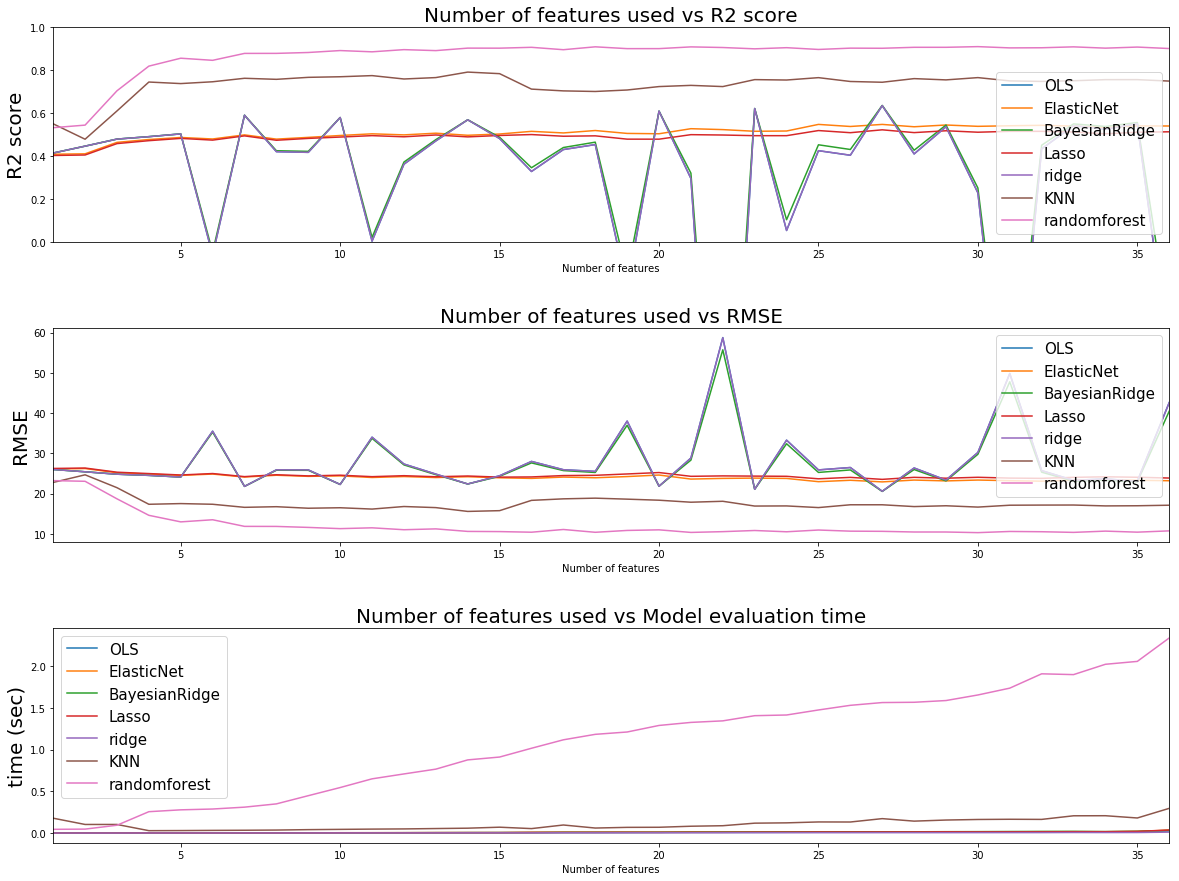

In [82]:
import matplotlib.pyplot as plt
df_merged[['features']+[i for i in df_merged.columns if 'R2' in i]]

fig = plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
for i in [i for i in df_merged.columns if 'R2' in i]:
    plt.plot(df_merged['features'],df_merged[i],label=i.split('_')[1])
plt.title('Number of features used vs R2 score',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Number of features')
plt.ylabel('R2 score',fontsize=20)
plt.ylim(0,1)
plt.xlim(1,36)

plt.subplot(3,1,2)
for i in [i for i in df_merged.columns if 'RMSE' in i]:
    plt.plot(df_merged['features'],df_merged[i],label=i.split('_')[1])
plt.legend(fontsize=15)
plt.title('Number of features used vs RMSE',fontsize=20)
plt.xlabel('Number of features')
plt.ylabel('RMSE',fontsize=20)
plt.xlim(1,36)

plt.subplot(3,1,3)
for i in [i for i in df_merged.columns if 'time' in i]:
    plt.plot(df_merged['features'],df_merged[i],label=i.split('_')[1])
plt.legend(fontsize=15)
plt.xlabel('Number of features')
plt.ylabel('time (sec)',fontsize=20)
plt.title('Number of features used vs Model evaluation time',fontsize=20)
plt.xlim(1,36)

plt.subplots_adjust(hspace=0.4)
plt.savefig('images/Model_Comparison.png')
plt.show()

In [15]:
best_results = pd.DataFrame()
for model in results['model'].unique():
    _  = results[(results['model']==model)].sort_values(by='RMSE',ascending=True).reset_index().loc[0]
    best_results = pd.concat([best_results,_],axis=1)
best_results = best_results.transpose().drop('index',axis=1)
best_results = best_results.sort_values(by='RMSE',ascending=True).reset_index().drop('index',axis=1)
best_results = best_results[['model','RMSE','R2 score', 'features','time']]
best_results = best_results.rename(columns={'features':'# of features used'})
for feature in ['RMSE','R2 score','time']:
    best_results[feature] = best_results[feature].apply(lambda x: round(x,4))
best_results

,model,RMSE,R2 score,# of features used,time
0,RandomForestRegressor,10.3001,0.9104,30,1.6523
1,KNN,15.5705,0.7917,14,0.0596
2,BayesianRidge,20.5437,0.6363,27,0.0167
3,Ridge,20.5642,0.6356,27,0.0061
4,OLS,20.5645,0.6356,27,0.0123
5,ElasticNet,22.9051,0.5479,27,0.0153
6,Lasso,23.5355,0.5227,27,0.0145


In [16]:
cols = best_results.columns
# Create a new DataFrame with just the markdown
# strings
df2 = pd.DataFrame([['---',]*len(cols)], columns=cols)
#Create a new concatenated DataFrame
df3 = pd.concat([df2, best_results])
#Save as markdown
df3.to_csv("best_results.md", sep="|", index=False)
#Source : https://stackoverflow.com/questions/33181846/programmatically-convert-pandas-dataframe-to-markdown-table
# reply #8